# MFIIndicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volume import MFIIndicator

In [8]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

In [9]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "mfi_"
    for w in windows:
        i = MFIIndicator(df.high, df.low, df.close, df.volume, window=w)
        df[name + str(w)] = i.money_flow_index()

In [10]:
variations([30, 40, 50, 60, 70, 80])

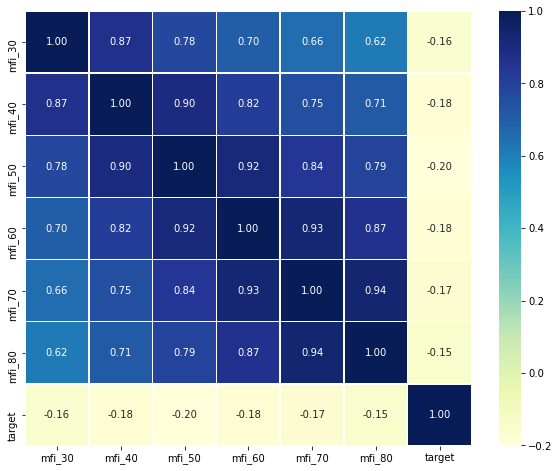

In [11]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

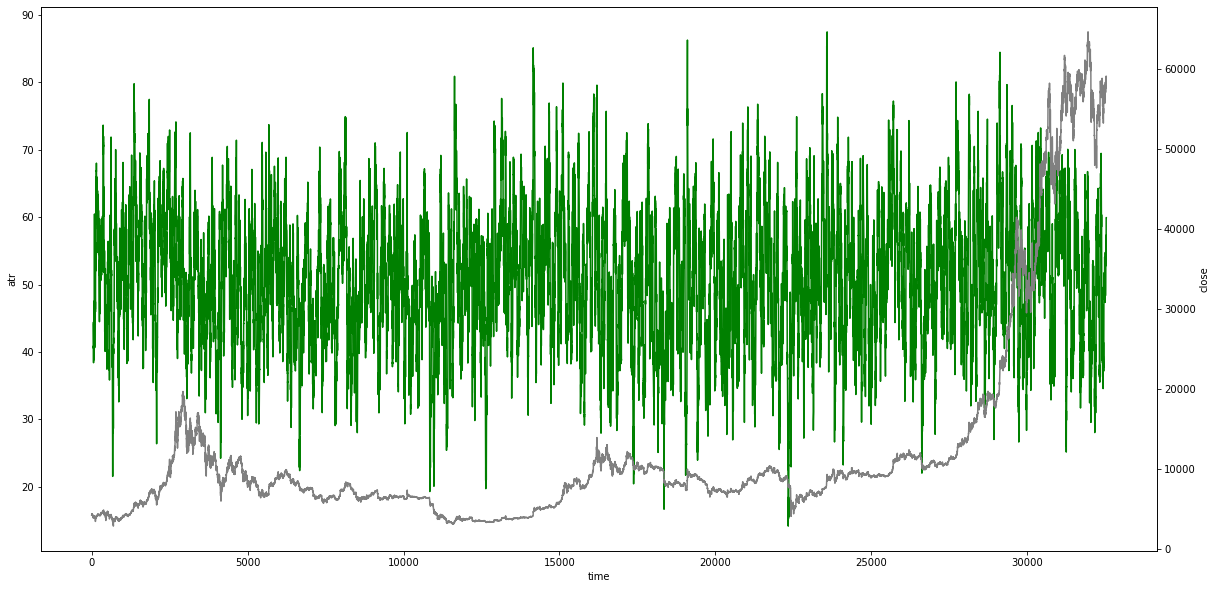

In [12]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.mfi_50,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## MFI 50 pick, try out rate

In [13]:
df["mfi_rate"] = uf.get_rate(uf.get_moving_average(df.mfi_50, 50))

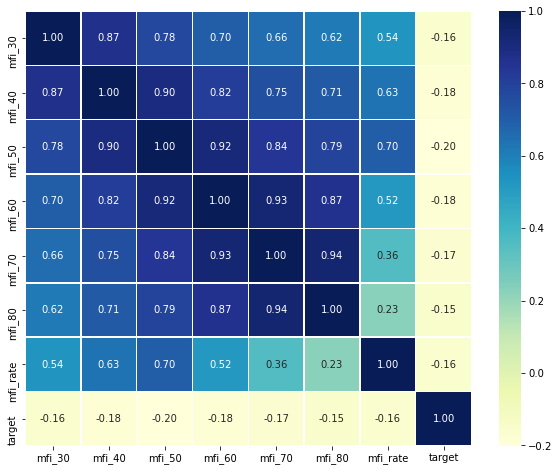

In [14]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

# Conclusion: MFI 50 